In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.loader import Loader
import seaborn as sns

# Objectives
This notebook aims to describe the basic main data that will be used in Machine Learning tasks NOT Deep Learning task

## Loading ML data

In [2]:
#Load the original data
data = Loader.load_all()["original"]

#Remove the columns that are used in NLP or redundant columns
filtered_columns = [col for col in data.columns if not( ("description" in col) or (col in ["car_id", "_id"]) )]

#Filter also redundant columns
data = data[filtered_columns]

d:\Código\ProyectoML\Cars_Price_Prediction\utils\loader.py:97: DtypeWarning: Columns (129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
d:\Código\ProyectoML\Cars_Price_Prediction\utils\loader.py:97: DtypeWarning: Columns (129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
d:\Código\ProyectoML\Cars_Price_Prediction\utils\loader.py:97: DtypeWarning: Columns (125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
d:\Código\ProyectoML\Cars_Price_Prediction\utils\loader.py:97: DtypeWarning: Columns (125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
d:\Código\ProyectoML\Cars_Price_Prediction\utils\loader.py:97: DtypeWarning: Columns (125,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
d:\Código\ProyectoML\

In [3]:
for i in data.columns: print(i)

price
km
year
color
cubicCapacity
brand
model
version
fuelType
bodyTypeId
transmissionTypeId
doors
seatingCapacity
warranty_months
province
environmentalLabel
co2Emissions
co2EmissionsGramsPerKm
trunkCapacityInLiters
maxSpeed
acceleration
hasDetails
jato_classification
traction
brakes
front_suspension
rear_suspension
power_cv
power_kw
rpm_max_power
max_torque_nm
rpm_max_torque
speakers
trip_computer
remote_audio_control_on_steering_wheel
dvd_navigation
antenna
abs
electronic_traction_control
stability_control
curve_braking_control
isofix_system
start_stop_automatic
cubicCapacity_seat_folded
Acabado Exterior_Alerón
Acabado Exterior_Cristales
Acabado Exterior_Faldones
Acabado Exterior_Pintura
Acabado Exterior_Rueda
consumption.urban
consumption.mixed
consumption.extraUrban
dimensions.width
dimensions.height
dimensions.length
electricFeatures.powerSource.batteryType
electricFeatures.motorType
electricFeatures.chargingConnector
electricFeatures.combinedConsumption.testType
idx
AC_Zones
AC_

# Columns descripptions

## Price distribution analysis

In this plot we can conclude that there is a cleary difference between 2 different class, normal ones and luxury ones.

In [4]:
def hist_plot(arr, n_bins, title = "hist_plot", x_label = "price", y_label="frecuency"):
    plt.figure(figsize=(8, 6))
    sns.histplot(arr, kde=True, bins=n_bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

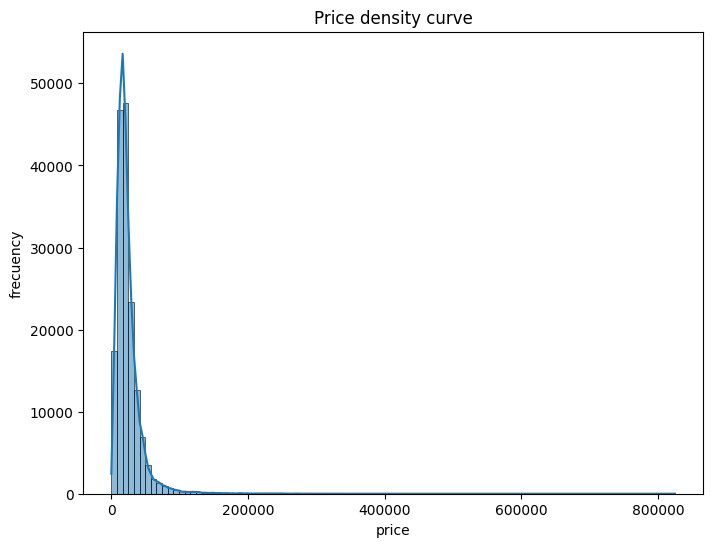

In [5]:
hist_plot(data["price"], n_bins=100, title='Price density curve')

In [6]:
price_data = data["price"]
counts, bin_edges = np.histogram(price_data, bins=100)  # Ajusta los bins según lo necesario

# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})

# Guarda en JSON

hist_data.to_json('data/charts_data.json', orient='records')

In [7]:
def filter_numbers(column:pd.DataFrame, limit: int):
    arr = column.to_numpy()
    smaller = arr[arr < limit]
    bigger = arr[arr >= limit]
    return smaller, bigger

In [8]:
limit = 100000 #This is an arbitrary number just extrated in raw from the previus plot
normal_prices, luxury_prices = filter_numbers(data["price"], limit)

In [9]:

counts, bin_edges = np.histogram(normal_prices, bins=100)  # Ajusta los bins según lo necesario
# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})
hist_data.to_json('data/standard_prices.json', orient='records')


counts, bin_edges = np.histogram(luxury_prices, bins=100)  # Ajusta los bins según lo necesario
# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})
hist_data.to_json('data/luxury_prices.json', orient='records')

Let's plot the distribution of the 2 different class of cars

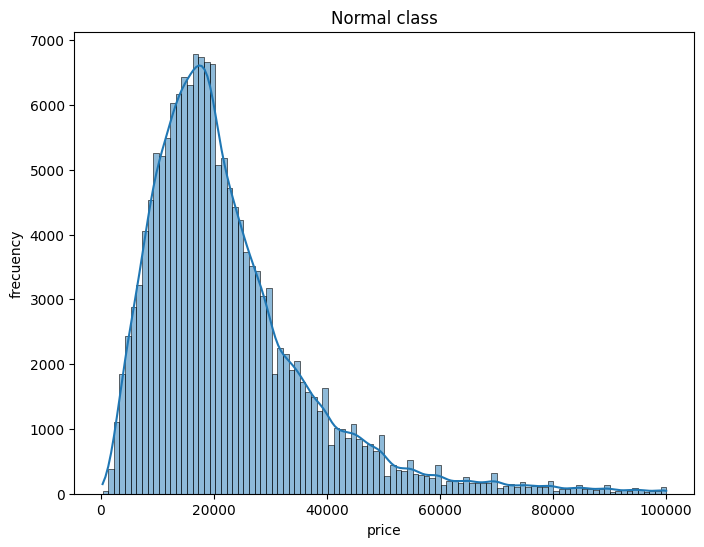

In [10]:
hist_plot(normal_prices, n_bins=100, title='Normal class')

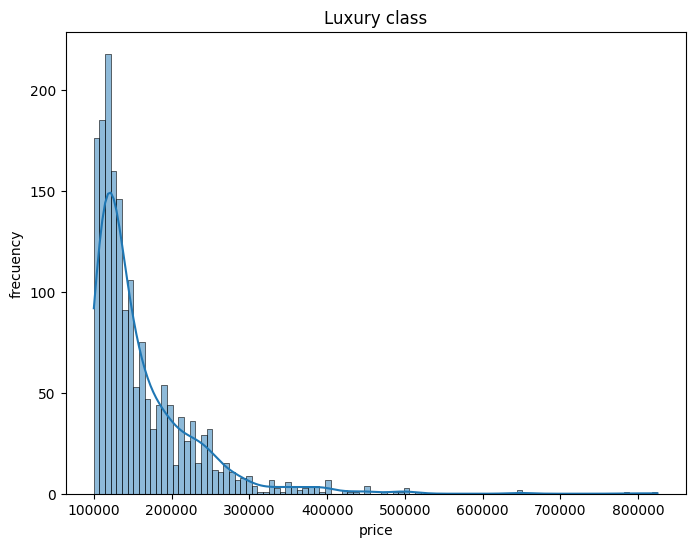

In [11]:
hist_plot(luxury_prices, n_bins=100, title='Luxury class')

## KM Analysis

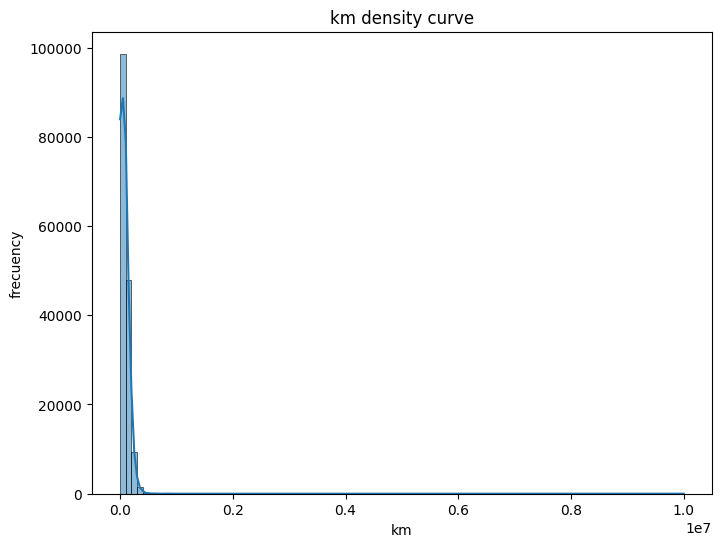

In [12]:
hist_plot(data["km"], n_bins=100, title='km density curve', x_label="km")

In [13]:
km_data = data["km"]
if km_data.isna().any():
    print("Se encontraron valores NaN en km_data. Se eliminarán.")
    km_data = km_data.dropna()  # Elimina los NaN

# Asegúrate de que hay datos suficientes después de eliminar NaN
if km_data.empty:
    raise ValueError("No hay datos suficientes para calcular el histograma después de eliminar NaN.")

# Calcula el histograma
counts, bin_edges = np.histogram(km_data, bins=100)  # Ajusta los bins según lo necesario

# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})

# Guarda en JSON
hist_data.to_json('data/km_data.json', orient='records')

Se encontraron valores NaN en km_data. Se eliminarán.


In [14]:
very_used, grandpa_lore = filter_numbers(data["km"], limit=200000)
grandpa_lore

array([420000., 309719., 225000., ..., 279000., 284501., 269000.])

In [15]:
#save data to json
counts, bin_edges = np.histogram(very_used, bins=100)  # Ajusta los bins según lo necesario
# Convierte los resultados en un DataFrame para guardar en JSON
hist_data = pd.DataFrame({
    'dataX': bin_edges[:-1],  # Los bordes de los bins (sin el último para coincidir con counts)
    'dataY': counts  # Frecuencia en cada bin
})
hist_data.to_json('data/km_less_200000.json', orient='records')



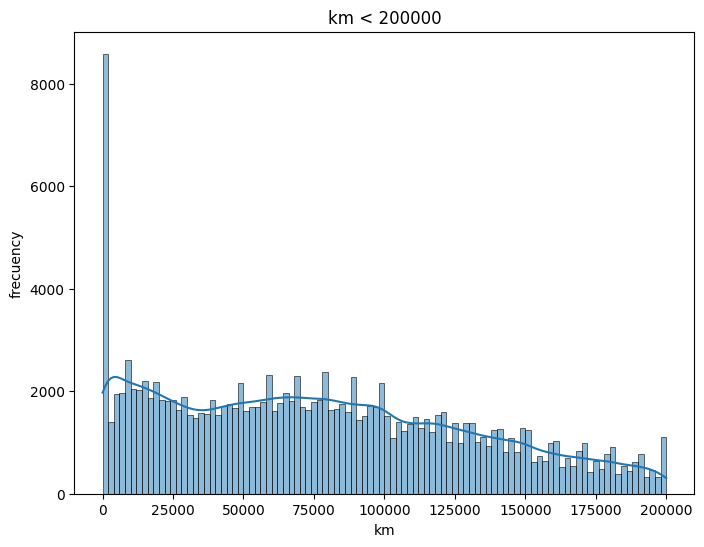

In [16]:
hist_plot(very_used, n_bins=100, title='km < 200000', x_label="km")

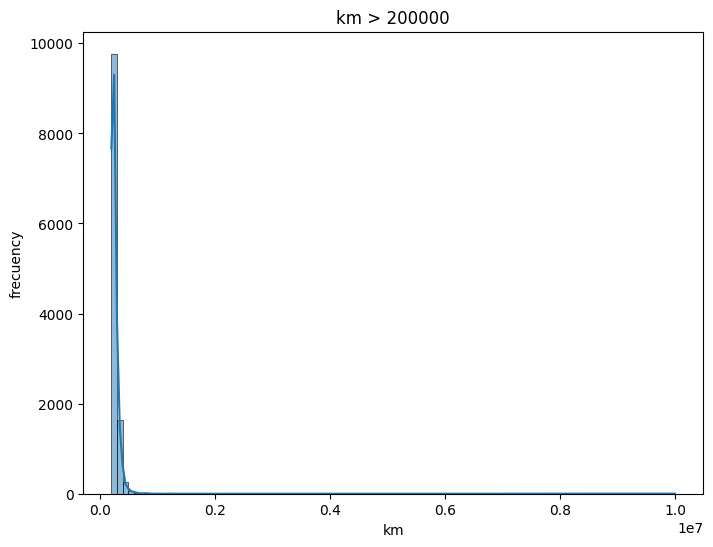

In [17]:
hist_plot(grandpa_lore, n_bins=100, title='km > 200000', x_label="km")

## Price-Km Analysis

In [26]:
def bin_and_plot(x_values, y_values, title, x_label, y_label):
    fig, ax = plt.subplots()
    
    # Cambiar el color de fondo a transparente
    fig.patch.set_alpha(0)
    ax.set_facecolor('none')  # fondo del gráfico transparente
    
    # Cambiar el color de los puntos a verde
    ax.scatter(x=x_values, y=y_values, color='#0174ff')
    
    # Cambiar el color del texto del título y etiquetas a blanco
    ax.set_title(title, color='white')
    ax.set_xlabel(x_label, color='white')
    ax.set_ylabel(y_label, color='white')
    
    # Cambiar color de los ticks y los bordes a blanco
    ax.tick_params(colors='white')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    
    # Mostrar la cuadrícula con líneas blancas
    ax.grid(True, color='white')
    
    # Mostrar el gráfico
    plt.show()

In [22]:
normal_class_km = data[data["price"] < limit]["km"]
luxury_class_km = data[data["price"] >= limit]["km"]

In [20]:
#guardar normal_class_km y luxury_class_km en JSON

#eliminar NAN

normal_class_km = normal_class_km.dropna()
luxury_class_km = luxury_class_km.dropna()

print(len(normal_class_km))

normal_class_km.to_json('data/normal_class_km.json', orient='records')
luxury_class_km.to_json('data/luxury_class_km.json', orient='records')

156141


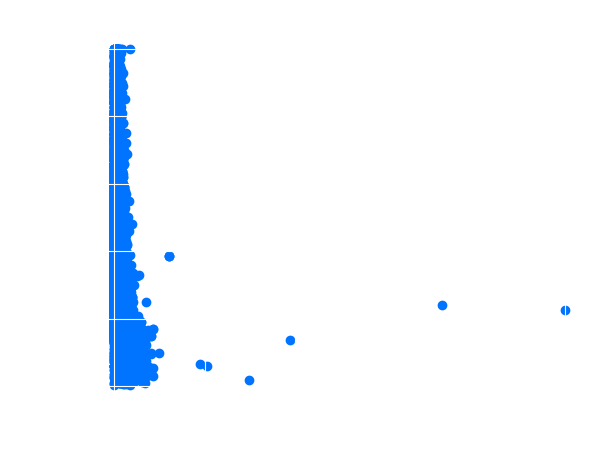

In [27]:
bin_and_plot (normal_class_km, normal_prices, title="Normal class", x_label="km", y_label="price")

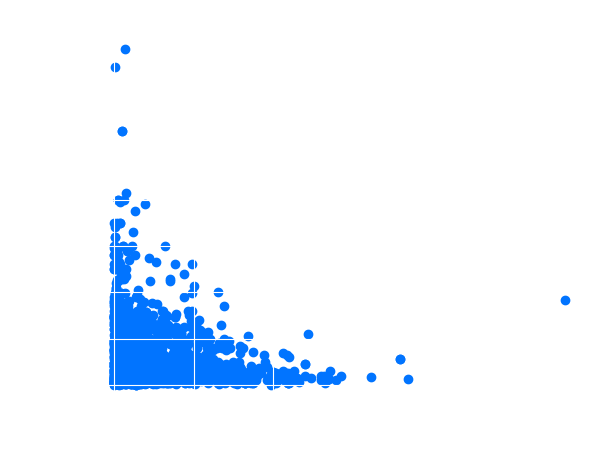

In [28]:
bin_and_plot (luxury_class_km, luxury_prices, title="Luxury class", x_label="km", y_label="price")

# CART

## PCA Analysis